In [ ]:
#importing required library
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
#Loading our dataset
#image transform and normalize

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.FashionMNIST('data', download = True, train = True, transform = transform)
testset = torchvision.datasets.FashionMNIST('data', download = True, train = False, transform = transform)


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
#creating our data for both traininng and testing.

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True, num_workers= 10)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = False, num_workers= 2)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
#constant for classes - in this case we have 10 different articles of clothing we are trying to classify.

classes = ('T-shirt/top', 'Trouser' , 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [ ]:
def matplotlib_imshow(img, one_channel = False):
    if one_channel:
        img = img.mean(dim = 0)
    img = img / 2 + 0.5 #unnormalize
    npimg = img.numpy()

    if one_channel:
        plt.imshow(npimg, cmap = "Greys")
    else:
        plt.imshow(np.transpose(npimg, (1,2,0)))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


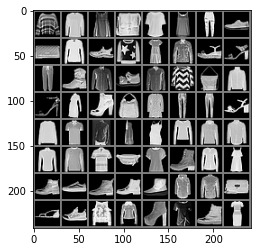

In [ ]:
dataiter = iter(trainloader)
images , lables = dataiter.next()
matplotlib_imshow(torchvision.utils.make_grid(images))

In [ ]:
#define our network architectur
#In this case we are using fairly basic multilayer perceptron so that it can train fast.

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784 , 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128 , 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        
        #make sure input tensor is flattened.
        x = x.view(x.shape[0], -1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim = 1)
        return x


In [ ]:
torch.manual_seed(2)
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
print(model.fc1.weight)

Parameter containing:
tensor([[ 0.0082, -0.0085,  0.0098,  ...,  0.0151,  0.0240,  0.0059],
        [ 0.0100,  0.0067,  0.0324,  ...,  0.0230,  0.0008,  0.0305],
        [-0.0026,  0.0180,  0.0146,  ...,  0.0066,  0.0298,  0.0159],
        ...,
        [ 0.0140,  0.0333,  0.0251,  ..., -0.0235,  0.0162, -0.0331],
        [-0.0146,  0.0304,  0.0128,  ...,  0.0075, -0.0304, -0.0246],
        [-0.0333,  0.0032, -0.0196,  ...,  0.0273,  0.0064, -0.0304]],
       requires_grad=True)


In [ ]:
#try out gradient computation

images, labels = iter(trainloader).next()
log_ps = model(images)
loss = criterion(log_ps, labels)
loss.backward()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
print(model.fc2.weight.grad)

tensor([[ 2.3204e-04, -3.4745e-03,  5.1503e-04,  ..., -3.9330e-04,
         -7.4528e-05, -4.4559e-04],
        [-4.6942e-04, -2.2129e-03, -3.4835e-04,  ..., -2.1949e-03,
         -2.0890e-03, -6.4407e-04],
        [ 1.7293e-04,  5.6443e-04, -1.6870e-04,  ..., -2.3798e-04,
         -2.4238e-04,  0.0000e+00],
        ...,
        [-7.9477e-04, -4.0606e-03,  1.2503e-04,  ..., -6.1213e-04,
         -1.0373e-03,  6.6699e-05],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 4.2305e-04,  4.5899e-05,  5.9412e-04,  ...,  1.5522e-03,
          1.2365e-03,  1.6403e-04]])


In [ ]:
#the training loop

epochs = 5
for e in range(epochs):
    #training
    running_loss = 0
    model.train()
    for images , labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)

        #zeroing out our gradient
        optimizer.zero_grad()

        #training a backwardpass
        loss.backward()

        #taking a step
        optimizer.step()

        #calculating our loss
        running_loss += loss.item()

    else:
        print(f"Training loss: {running_loss/1000}", end  = " ")

    #evaluation 
    model.eval()

    with torch.no_grad():
        total = 0 
        correct = 0

        for images, labels in testloader:
            log_ps = model(images)

            #finding the maximum class
            mx_index = torch.argmax(log_ps, dim = 1)
            total += labels.numel()
            correct += sum(mx_index == labels).item()
        print(f"Test Accuracy: {correct/total * 100:0.2f}")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training loss: 1.186297006368637 Test Accuracy: 74.65
Training loss: 0.5632810154259205 Test Accuracy: 77.69
Training loss: 0.48648022900521753 Test Accuracy: 81.09
Training loss: 0.44726090244948863 Test Accuracy: 81.76
Training loss: 0.4202817100584507 Test Accuracy: 82.51


In [ ]:
#let's test the network on our test set data.
#we have created a handy function that plots our inference reults.

def view_classify(img, ps, version = "Fashion"):

    #function for viewing an image and its predicted classes.

    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize = (6, 9), ncols = 2)
    ax1.imshow(img.resize_(1,28,28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(['T-shirt/top', 'Trouser' , 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'] , size = 'small')
    ax2.set_title('class probability')
    ax2.set_xlim(0, 1.1)

predicted class =   1
predicted class =   3
predicted class =   4
predicted class =   3
predicted class =   2


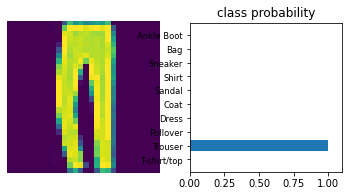

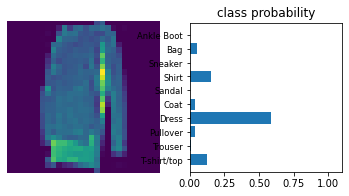

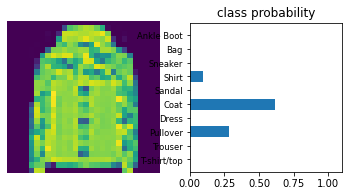

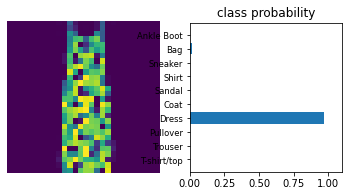

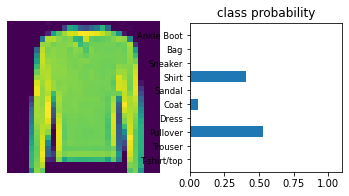

In [ ]:
#lets do a prediction 
#the code below converts the logits, or row outputs from the model into actual probabilites that can be more easily classified.

td = iter(testloader)
for _ in range(5):
    images, labels = next(td)

    img = images[2].view(1, 784)
    with torch.no_grad():
        logps = model(img)
        
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    print("predicted class =  ", probab.index(max(probab)))
    view_classify(img.view(1, 28, 28), ps)

In [ ]:
#parameters our model learnt
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.0104, -0.0063,  0.0120,  ...,  0.0173,  0.0263,  0.0081],
                      [ 0.0089,  0.0056,  0.0313,  ...,  0.0212, -0.0006,  0.0293],
                      [-0.0098,  0.0109,  0.0074,  ...,  0.0008,  0.0230,  0.0088],
                      ...,
                      [ 0.0145,  0.0338,  0.0256,  ..., -0.0204,  0.0175, -0.0324],
                      [-0.0135,  0.0315,  0.0138,  ...,  0.0059, -0.0300, -0.0237],
                      [-0.0350,  0.0015, -0.0213,  ...,  0.0275,  0.0052, -0.0320]])),
             ('fc1.bias',
              tensor([-2.0490e-02, -2.4931e-02,  1.2782e-03, -2.3555e-02, -3.3365e-02,
                       1.6884e-02,  8.6564e-03,  1.8270e-02,  2.0598e-02, -1.8518e-02,
                       1.2490e-02,  1.3089e-02,  7.1879e-03, -1.8581e-02,  3.4232e-02,
                       3.5025e-02,  1.5157e-02,  1.5441e-02, -1.1181e-03,  2.6188e-02,
                      -9.9770e-03, -4.1159e-03, -6.6081e-03,  3.